In [1]:
print("radhe radhe")

radhe radhe


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

# IMPORT DATASET PATH
DATASET_PATH= os.getenv("DATASET_PATH")

In [3]:
import pandas as pd
# LOAD DATASET
df = pd.read_csv(DATASET_PATH,parse_dates=["Year"],dayfirst=False,index_col="Year")
df.head()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1901-01-01,17.970,21.334,26.523,31.712,32.202,32.075,28.830,28.260,28.071,27.048,21.739,18.100
1902-01-01,19.304,21.540,28.050,29.945,31.773,31.343,28.291,28.699,28.324,26.327,21.515,17.922
1903-01-01,19.092,20.611,26.948,31.629,33.581,30.709,29.313,28.320,28.031,26.142,21.093,17.255
1904-01-01,18.450,21.011,27.169,31.998,31.217,29.839,27.817,28.083,28.095,26.182,21.398,18.735
1905-01-01,18.249,18.904,25.173,28.574,30.625,32.965,28.291,28.349,27.829,26.294,21.700,18.011


### DATA CLEANING

In [4]:
# CHECKING IS NULL VALUE HAVE
df.isna().sum()
# no null value present

Jan    0
Feb    0
Mar    0
Apr    0
May    0
Jun    0
Jul    0
Aug    0
Sep    0
Oct    0
Nov    0
Dec    0
dtype: int64

In [5]:
# checking all datatype 
df.info()

# all value is float and not null 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 1901-01-01 to 2002-01-01
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     102 non-null    float64
 1   Feb     102 non-null    float64
 2   Mar     102 non-null    float64
 3   Apr     102 non-null    float64
 4   May     102 non-null    float64
 5   Jun     102 non-null    float64
 6   Jul     102 non-null    float64
 7   Aug     102 non-null    float64
 8   Sep     102 non-null    float64
 9   Oct     102 non-null    float64
 10  Nov     102 non-null    float64
 11  Dec     102 non-null    float64
dtypes: float64(12)
memory usage: 10.4 KB


## plotting all value  

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline


# plotting figure function
def plt_figures(df,title=""):
    
    plt.figure(figsize=(30,20))
    for i,month in enumerate(df.columns):
        plt.subplot(4,3,i+1)
        plt.plot(df[month])
        plt.title(f"{month} {title}")
        plt.xlabel('Year')
        plt.ylabel('Temperature')
        plt.tight_layout()
        
        
    plt.suptitle('Monthly Temperature Trends Over Time',y=1.02)

    plt.show()

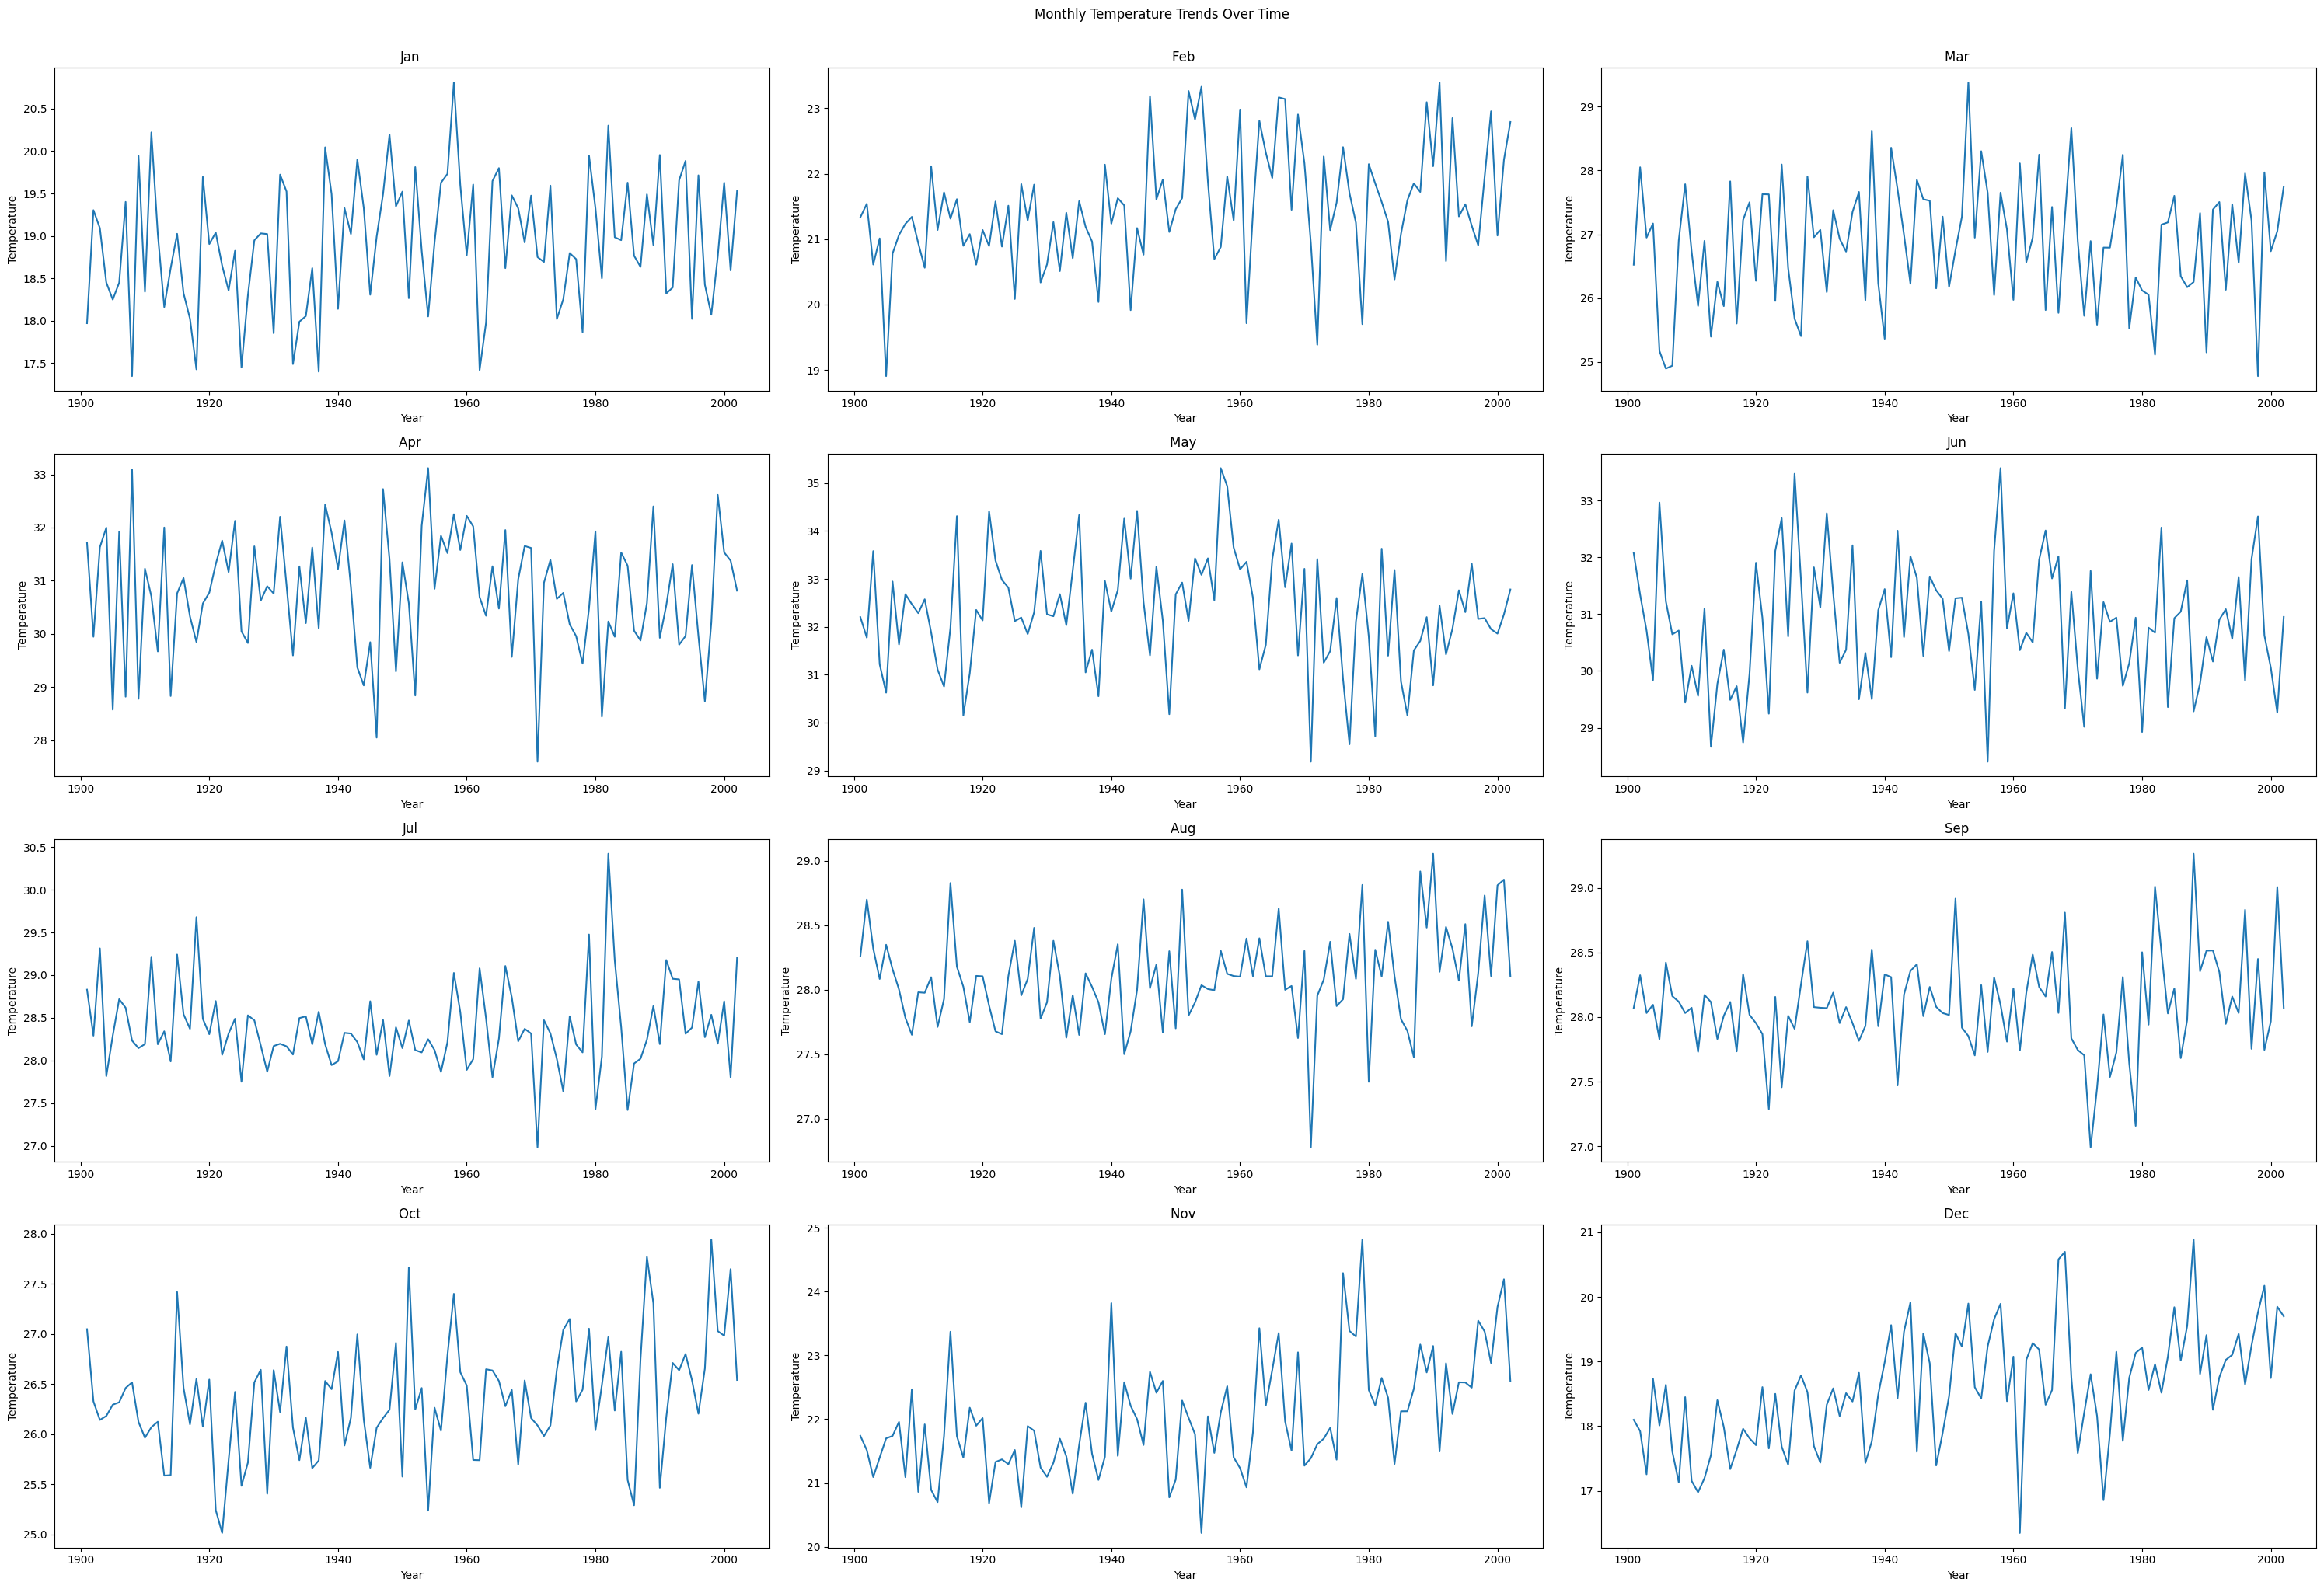

In [163]:
# plot figute
plt_figures(df)

# Data preprocessing  data augmentation  

### Stationary: 
    Defination:
    ""A stationary time series is one where the joint probability distribution of its values at any set of time points is the same as the joint probability distribution of its values at any other set of time points. ""


    condition:
        1. Constant mean 
        2. Constant variance
        3. Autocorrelation structure that does not change with time lag 

## check whether a time series dataset is stationary or not
    1. Visual Inspection
    2. Augmented Dickey-Fuller (ADF) Test
    3. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Tes

### Visual Inspection


TypeError: figtext() missing 3 required positional arguments: 'x', 'y', and 's'

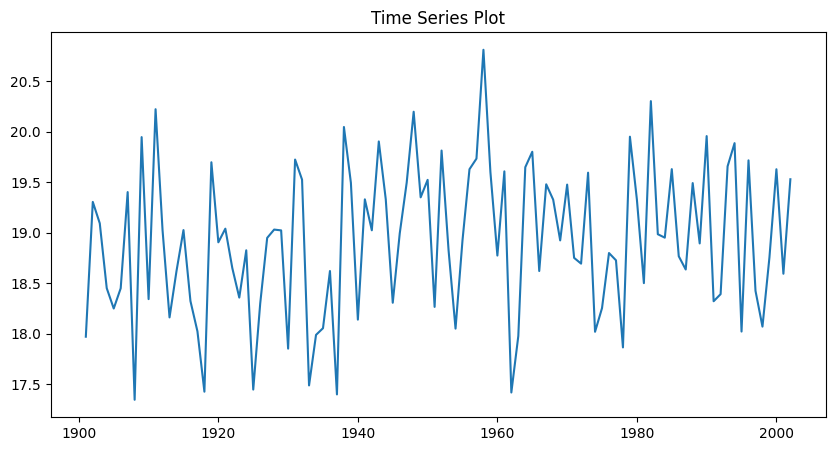

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

month="Jan"
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df[month], label="Time Series")
plt.title("Time Series Plot")
plt.legend()
plt.show()


In [9]:
'''
    by visualizing the plot this is diffucult say 
'''

'\n    by visualizing the plot this is diffucult say \n'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def check_constant_mean(df, column_name, window=10):
    """
    Checks whether a time series has a constant mean.
    
    Parameters:
    - df: pandas DataFrame containing the time series data
    - column_name: str, the column to analyze
    - window: int, size of rolling mean window (default is 10)
    
    Returns:
    - A statement indicating whether the series is globally or locally stationary
    """
    
    # Compute rolling mean
    rolling_mean = df[column_name].rolling(window=window).mean()

    # Plot original data and rolling mean
    plt.figure(figsize=(10, 5))
    plt.plot(df[column_name], label="Original Data", alpha=0.5)
    plt.plot(rolling_mean, label=f"Rolling Mean (Window={window})", color="red")
    plt.title(f"Rolling Mean Check for {column_name}")
    plt.legend()
    plt.show()

    # Define window size for segmenting the data
    window_size = len(df) // 3  # Split into 3 equal parts
    print(f"The window size is {window_size}")

    # Compute mean in each segment
    mean_1 = df[column_name][:window_size].mean()
    mean_2 = df[column_name][window_size:2*window_size].mean()
    mean_3 = df[column_name][2*window_size:].mean()

    print(f"Mean in Segment 1: {mean_1:.3f}")
    print(f"Mean in Segment 2: {mean_2:.3f}")
    print(f"Mean in Segment 3: {mean_3:.3f}")
    
    # Check if means are close within a tolerance
    if np.isclose(mean_1, mean_2, atol=0.1) and np.isclose(mean_2, mean_3, atol=0.1):
        print("The series is globally stationary.")
        return 1
    else:
        print("The series is locally stationary.")
        return 0


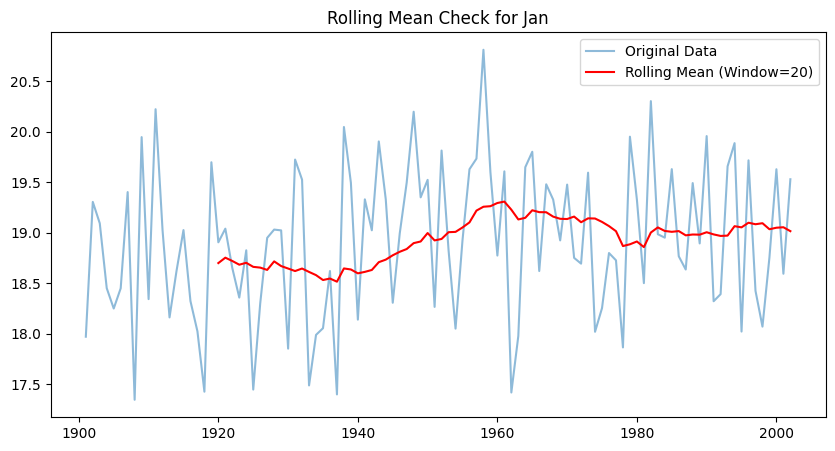

The window size is 34
Mean in Segment 1: 18.652
Mean in Segment 2: 19.102
Mean in Segment 3: 18.984
The series is locally stationary.
The mean of 'Jan' is not constant


In [11]:
if check_constant_mean(df,"Jan",20):
    print("The mean of 'Jan' is constant")
else: print("The mean of 'Jan' is not constant")

#  conclution not constant mean

In [15]:
# check constant verience
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bartlett, levene

def check_constant_variance(df, column_name, window=10):
    """
    Checks whether a time series has a constant variance.
    
    Parameters:
    - df: pandas DataFrame containing the time series data
    - column_name: str, the column to analyze
    - window: int, size of rolling standard deviation window (default is 10)
    
    Returns:
    - A statement indicating whether the series has constant or changing variance.
    """
    
    # Compute rolling standard deviation
    rolling_std = df[column_name].rolling(window=window).std()

    # Plot original data and rolling std deviation
    plt.figure(figsize=(10, 5))
    plt.plot(df[column_name], label="Original Data", alpha=0.5)
    plt.plot(rolling_std, label=f"Rolling Std Dev (Window={window})", color="red")
    plt.title(f"Rolling Standard Deviation for {column_name}")
    plt.legend()
    plt.show()

    # Define window size for segmenting the data
    window_size = len(df) // 3  # Split into 3 equal parts
    print(f"The window size is {window_size}")

    # Compute variance in each segment
    var_1 = np.var(df[column_name][:window_size], ddof=1)
    var_2 = np.var(df[column_name][window_size:2*window_size], ddof=1)
    var_3 = np.var(df[column_name][2*window_size:], ddof=1)

    print(f"Variance in Segment 1: {var_1:.3f}")
    print(f"Variance in Segment 2: {var_2:.3f}")
    print(f"Variance in Segment 3: {var_3:.3f}")

    # Check if variances are close within a tolerance
    if np.isclose(var_1, var_2, atol=0.1) and np.isclose(var_2, var_3, atol=0.1):
        print("The variance is stable → Homoscedastic (Constant Variance).")
        return 1
    else:
        print("The variance is not stable → Heteroscedastic (Non-Constant Varianc).")
        return 0

    # # Statistical test: Bartlett’s test (assumes normality)
    # bartlett_test = bartlett(df[column_name][:window_size], 
    #                         df[column_name][window_size:2*window_size], 
    #                         df[column_name][2*window_size:])
    
    # # Statistical test: Levene’s test (does not assume normality)
    # levene_test = levene(df[column_name][:window_size], 
    #                     df[column_name][window_size:2*window_size], 
    #                     df[column_name][2*window_size:])

    # print(f"Bartlett's test p-value: {bartlett_test.pvalue:.3f}")
    # print(f"Levene's test p-value: {levene_test.pvalue:.3f}")

    # if bartlett_test.pvalue < 0.05 or levene_test.pvalue < 0.05:
    #     return variance_status + " (Confirmed by statistical tests: Variance is NOT constant)"
    # else:
    #     return variance_status + " (Confirmed by statistical tests: Variance is constant)"



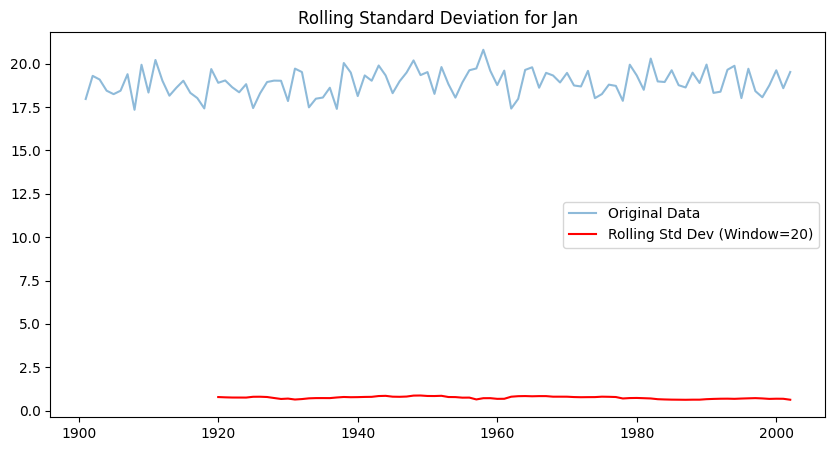

The window size is 34
Variance in Segment 1: 0.547
Variance in Segment 2: 0.640
Variance in Segment 3: 0.423
The variance is not stable → Heteroscedastic (Non-Constant Varianc).
The variance of the data is not constant.


In [17]:
if check_constant_variance(df,"Jan",20):
    print("The variance of the data is constant.")
else:
    print("The variance of the data is not constant.")

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, q_stat
from statsmodels.graphics.tsaplots import plot_acf

def check_autocorrelation_stability(df, column_name, max_lag=20):
    """
    Checks if the autocorrelation structure remains stable over time.
    
    Parameters:
    - df: pandas DataFrame containing the time series data
    - column_name: str, the column to analyze
    - max_lag: int, number of lags to consider in ACF (default is 20)
    
    Returns:
    - Plots the ACF in different segments to compare structure.
    """
    
    # Compute ACF for the full data
    plt.figure(figsize=(12, 5))
    plot_acf(df[column_name], lags=max_lag, title="ACF of Full Data")
    plt.show()
    
    # Define window size
    window_size = len(df) // 3  # Split into 3 equal parts
    print(f"Window size: {window_size}")

    # Compute ACF for three different segments
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for i, start in enumerate(range(0, len(df), window_size)):
        segment = df[column_name][start:start + window_size]
        plot_acf(segment, lags=max_lag, ax=axes[i])
        axes[i].set_title(f"ACF - Segment {i+1}")

    plt.tight_layout()
    plt.show()
    
    # Perform Ljung-Box test to check if ACF changes significantly
    ljung_box_pvalues = q_stat(acf(df[column_name], nlags=max_lag, fft=False)[1:], len(df))[1]
    
    if np.any(ljung_box_pvalues < 0.05):
        print("Ljung-Box test: Autocorrelation structure changes over time → Not stationary.")
        return 1
    else:
        print("Ljung-Box test: Autocorrelation structure remains stable → Likely stationary.")
        return 0



<Figure size 1200x500 with 0 Axes>

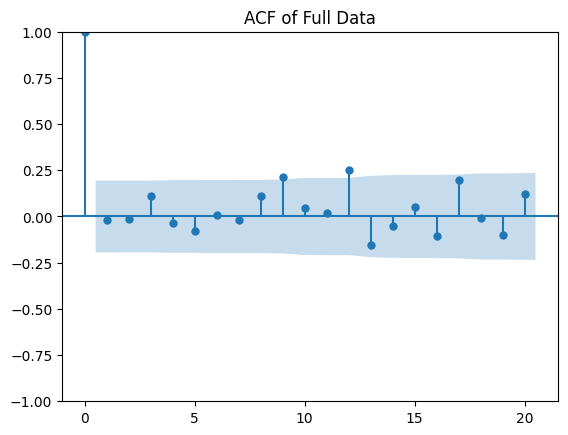

Window size: 34


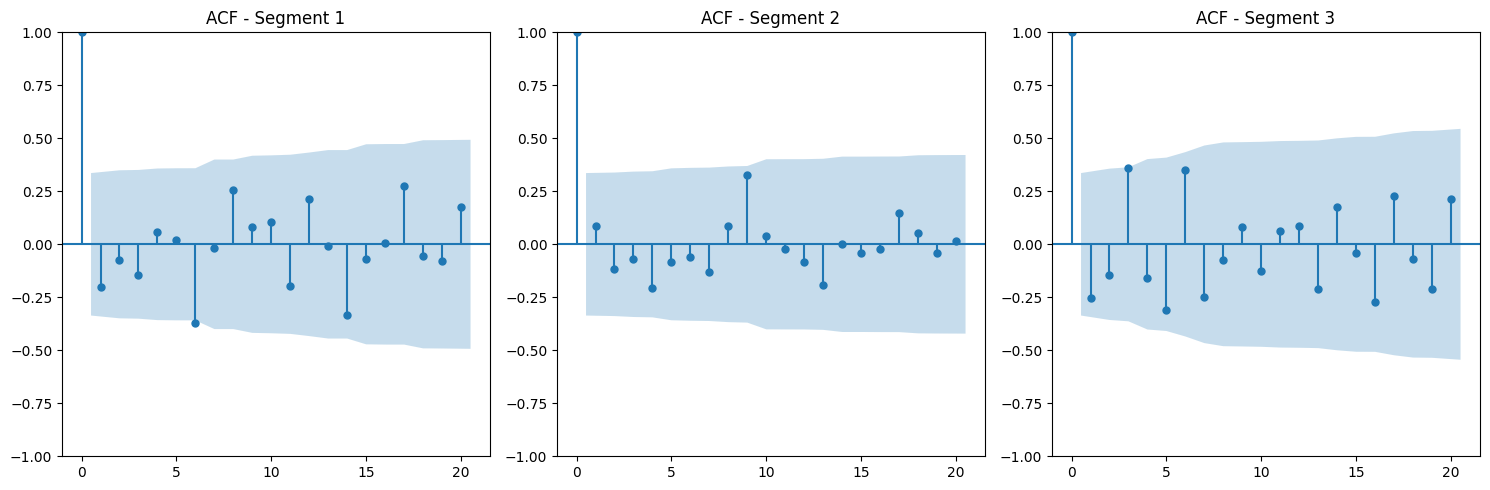

Ljung-Box test: Autocorrelation structure remains stable → Likely stationary.


0

In [21]:
check_autocorrelation_stability(df,"Jan")

In [22]:
# by manual 
# 1. not const mean
# 2. not const std
# 3. no auto correlation 

# conclution not stationary

###  2. Augmented Dickey-Fuller (ADF) Test

In [57]:
from statsmodels.tsa.stattools import adfuller

def check_ADF_stationarity(df, column):
    """
    Performs the Augmented Dickey-Fuller test to check for stationarity.

    Parameters:
    - df: pandas DataFrame containing the time series data
    - column: str, the column to analyze

    Prints:
    - ADF Statistic
    - p-value
    - Critical values
    - Stationarity conclusion
    """
    result = adfuller(df[column])

    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")

    if result[1] < 0.05:
        print("✅ The time series is **stationary** (rejects H0).")
        return 1
    else:
        print("❌ The time series is **non-stationary** (fails to reject H0).")
        return 0




In [58]:
check_ADF_stationarity(df,"Jan")

ADF Statistic: -10.1995
p-value: 0.0000
Critical Values:
   1%: -3.4968
   5%: -2.8906
   10%: -2.5823
✅ The time series is **stationary** (rejects H0).


1

###     3. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Tes

In [34]:
from statsmodels.tsa.stattools import kpss

def check_kpss_stationarity(df, column):
    """
    Performs the KPSS test to check for stationarity.

    Parameters:
    - df: pandas DataFrame containing the time series data
    - column: str, the column to analyze

    Prints:
    - KPSS Statistic
    - p-value
    - Critical values
    - Stationarity conclusion
    """
    result = kpss(df[column], regression="c", nlags="auto")

    print(f"KPSS Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[3].items():
        print(f"   {key}: {value:.4f}")

    if result[1] < 0.05:
        print("❌ The time series is **non-stationary** (rejects H0).")
        return 0
    else:
        print("✅ The time series is **stationary** (fails to reject H0).")
        return 1



In [35]:
check_kpss_stationarity(df,"Jan")

KPSS Statistic: 0.4741
p-value: 0.0475
Critical Values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
❌ The time series is **non-stationary** (rejects H0).


0

In [31]:
# by kpss test not stationary
# and adf test this is starionary

# conclution 
# tha data set is not stationary

In [61]:
month="Jan"
if check_ADF_stationarity(df,month) and check_kpss_stationarity(df,month):
    print("Stationarity and trend are present in the data for month", month)
else:
    print("Stationarity and trend are not present in the data for month", month)

ADF Statistic: -10.1995
p-value: 0.0000
Critical Values:
   1%: -3.4968
   5%: -2.8906
   10%: -2.5823
✅ The time series is **stationary** (rejects H0).
KPSS Statistic: 0.4741
p-value: 0.0475
Critical Values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
❌ The time series is **non-stationary** (rejects H0).
Stationarity and trend are not present in the data for month Jan


In [62]:
adfuller(df.Jan)

(np.float64(-10.199462333043286),
 np.float64(6.02367960644157e-18),
 0,
 101,
 {'1%': np.float64(-3.4968181663902103),
  '5%': np.float64(-2.8906107514600103),
  '10%': np.float64(-2.5822770483285953)},
 np.float64(200.90611534804947))

In [63]:
kpss(df.Jan)

(np.float64(0.47414575053259106),
 np.float64(0.04748969582599301),
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(df, column_name):
    """
    Check if a time series is stationary using both ADF and KPSS tests.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the time series data.
    column_name (str): The column to check for stationarity.

    Returns:
    dict: A dictionary containing ADF & KPSS results along with a conclusion.
    """
    data = df[column_name].dropna()
    is_stationary = 0  # Default: Assume non-stationary

    # ADF Test
    adf_result = adfuller(data)
    adf_stat, adf_p_value, _, _, adf_crit_values = adf_result[:5]

    # KPSS Test (Handling possible exceptions)
    try:
        kpss_result = kpss(data, regression="c", nlags="auto")
        kpss_stat, kpss_p_value, _, kpss_crit_values = kpss_result
    except ValueError as e:
        print(f"⚠️ KPSS Test Warning: {e}")
        kpss_stat, kpss_p_value, kpss_crit_values = None, None, None

    # print("\n🚀 Checking Stationarity for:", column_name)
    # print("=" * 50)

    # # ADF Test Results
    # print("📌 ADF Test Results:")
    # print(f"ADF Statistic: {adf_stat:.4f}")
    # print(f"p-value: {adf_p_value:.4f}")
    # print(f"Critical Values: {adf_crit_values}")

    # # KPSS Test Results (if available)
    # if kpss_stat is not None:
    #     print("\n📌 KPSS Test Results:")
    #     print(f"KPSS Statistic: {kpss_stat:.4f}")
    #     print(f"p-value: {kpss_p_value:.4f}")
    #     print(f"Critical Values: {kpss_crit_values}")

    # Decision Logic
    if adf_p_value < 0.05 and kpss_p_value is not None and kpss_p_value > 0.05:
        is_stationary = 1
        conclusion = "✅ The series is **Stationary**."
    elif adf_p_value > 0.05 and kpss_p_value is not None and kpss_p_value < 0.05:
        conclusion = "❌ The series is **Non-Stationary**."
    elif adf_p_value < 0.05 and kpss_p_value is not None and kpss_p_value < 0.05:
        conclusion = "⚠️ The series is **Trend Stationary** (Detrending may be needed)."
    else:
        conclusion = "❓ Inconclusive results. Further analysis required."

    # print(f"\n📢  month: {column_name}  \n   Conclusion: {conclusion}")

    # Return results in a structured dictionary
    return {
        "month": column_name,
        "adf_p": round(adf_p_value, 4),
        "kpss_p": round(kpss_p_value, 4) if kpss_p_value is not None else None,
        "is_sta": bool(is_stationary),
        "conclusion": conclusion
    }

# Example Usage:
# df = pd.read_csv("your_time_series_data.csv")
# result = check_stationarity(df, "Jan")
# print(result)


In [153]:
stationaty_result_monthly=check_stationarity(df, "Jan")


📢  month: Jan  
   Conclusion: ⚠️ The series is **Trend Stationary** (Detrending may be needed).


In [ ]:
result=[]
colums=["MONTH",   "ADF-TEST",    "KPSS-TEST",   "STATIONARY" ,    "CONCLUTION" ]

for month in df.columns:
    data=[]
    stationaty_result_monthly=check_stationarity(df, month)
    data.append(stationaty_result_monthly["month"])
    data.append(float(stationaty_result_monthly["adf_p"]))
    data.append(float(stationaty_result_monthly["kpss_p"]))
    data.append(stationaty_result_monthly["is_sta"])
    data.append(stationaty_result_monthly["conclusion"])
    result.append(data)

stationaty_result=pd.DataFrame(result,columns=colums)

In [207]:
import pandas as pd

def check_all_months_stationarity(df):
    """
    Check stationarity for all months in the DataFrame using ADF and KPSS tests.

    Parameters:
    df (pd.DataFrame): DataFrame containing monthly time series data.

    Returns:
    pd.DataFrame: DataFrame containing stationarity results for each month.
    """
    columns = ["MONTH", "ADF-TEST", "KPSS-TEST", "STATIONARY", "CONCLUSION"]
    results = []

    for month in df.columns:  # Iterate over each month column
        stationarity_result = check_stationarity(df, month)  # Function returns a tuple

        # Unpacking tuple
        month_name, adf_p, kpss_p, is_stationary, conclusion = stationarity_result

        # Append results
        results.append([month_name, adf_p, kpss_p, is_stationary, conclusion])

    # Convert results into a DataFrame
    stationary_result_df = pd.DataFrame(results, columns=columns)

    return stationary_result_df  # Return the DataFrame

# Example Usage:
# stationary_result_df = check_all_months_stationarity(df)
# print(stationary_result_df)


In [ ]:
stationary_result_df = check_all_months_stationarity(df)



In [206]:
stationaty_result

,MONTH,ADF-TEST,KPSS-TEST,STATIONARY,CONCLUTION
0,Jan,0.0000,0.0475,False,⚠️ The series is **Trend Stationary** (Detrend...
1,Feb,0.0000,0.0100,False,⚠️ The series is **Trend Stationary** (Detrend...
2,Mar,0.0000,0.1000,True,✅ The series is **Stationary**.
3,Apr,0.0000,0.1000,True,✅ The series is **Stationary**.
4,May,0.0000,0.1000,True,✅ The series is **Stationary**.
5,Jun,0.0000,0.1000,True,✅ The series is **Stationary**.
6,Jul,0.0000,0.1000,True,✅ The series is **Stationary**.
7,Aug,0.0000,0.0571,True,✅ The series is **Stationary**.
8,Sep,0.0000,0.1000,True,✅ The series is **Stationary**.
9,Oct,0.0000,0.0100,False,⚠️ The series is **Trend Stationary** (Detrend...


In [200]:
# finding d value
non_stationary_col=[month for i,month in enumerate(stationaty_result.MONTH)  if stationaty_result.STATIONARY[i]==False  ]
    

In [201]:
non_stationary_col

['Jan', 'Feb', 'Oct', 'Nov', 'Dec']

In [ ]:
# finding d value
d = 0
for month in df.columns:
    stationaty_result_monthly=check_stationarity(df, month)
    if stationaty_result_monthly
    df[f"{month}_{d+1}"]=df[month].diff().dropna()

In [216]:
import numpy as np
import pandas as pd
import warnings
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tools.sm_exceptions import InterpolationWarning

# Suppress InterpolationWarnings from KPSS test
warnings.simplefilter("ignore", InterpolationWarning)

def check_stationarity(df, column_name):
    """
    Check if a time series is stationary using both ADF and KPSS tests.
    If non-stationary, apply first-order differencing and re-evaluate.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the time series data.
    column_name (str): The column to check for stationarity.

    Returns:
    dict: A dictionary containing ADF & KPSS results along with a conclusion.
    """
    data = df[column_name].dropna()
    is_stationary = False  # Default: Assume non-stationary

    # ADF Test
    adf_result = adfuller(data)
    adf_p_value = round(adf_result[1], 4)

    # KPSS Test with error handling
    try:
        kpss_result = kpss(data, regression="c", nlags="auto")
        kpss_p_value = round(kpss_result[1], 4)
    except ValueError as e:
        print(f"⚠️ KPSS Test Warning for {column_name}: {e}")
        kpss_p_value = None  # Assign None if KPSS fails

    # Decision Logic
    if adf_p_value < 0.05 and (kpss_p_value is None or kpss_p_value > 0.05):
        is_stationary = True
        conclusion = "✅ The series is **Stationary**."
    elif adf_p_value > 0.05 and (kpss_p_value is not None and kpss_p_value < 0.05):
        conclusion = "❌ The series is **Non-Stationary**."
    elif adf_p_value < 0.05 and (kpss_p_value is not None and kpss_p_value < 0.05):
        conclusion = "⚠️ The series is **Trend Stationary** (Detrending may be needed)."
    else:
        conclusion = "❓ Inconclusive results. Further analysis required."

    # Initial results
    result = {
        "month": column_name,
        "adf_p": adf_p_value,
        "kpss_p": kpss_p_value,
        "is_sta": is_stationary,
        "conclusion": conclusion
    }

    # If non-stationary, apply first-order differencing and re-test
    if not is_stationary:
        diff_data = data.diff().dropna()
        adf_result_diff = adfuller(diff_data)
        adf_p_diff = round(adf_result_diff[1], 4)

        try:
            kpss_result_diff = kpss(diff_data, regression="c", nlags="auto")
            kpss_p_diff = round(kpss_result_diff[1], 4)
        except ValueError as e:
            print(f"⚠️ KPSS Test Warning for {column_name} after differencing: {e}")
            kpss_p_diff = None

        # Re-evaluate stationarity after differencing
        is_stationary_diff = adf_p_diff < 0.05 and (kpss_p_diff is None or kpss_p_diff > 0.05)
        conclusion_diff = "✅ The series is **Stationary** after differencing." if is_stationary_diff else "❌ The series is still **Non-Stationary**."

        result["after_diff"] = {
            "month": column_name,
            "adf_p": adf_p_diff,
            "kpss_p": kpss_p_diff,
            "is_sta": is_stationary_diff,
            "conclusion": conclusion_diff
        }

    return result

# Example Usage:
# df = pd.read_csv("your_time_series_data.csv")
# result = check_stationarity(df, "Jan")
# print(result)


In [217]:
result = check_stationarity(df, "Jan")
print(result)

{'month': 'Jan', 'adf_p': np.float64(0.0006), 'kpss_p': np.float64(0.1), 'is_sta': True, 'conclusion': '✅ The series is **Stationary**.'}


In [218]:
result

{'month': 'Jan',
 'adf_p': np.float64(0.0006),
 'kpss_p': np.float64(0.1),
 'is_sta': True,
 'conclusion': '✅ The series is **Stationary**.'}